In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/checkins.csv', na_values=['', '                   '])

/Users/michil/.virtualenvs/cs102/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.columns = df.columns.str.strip()

In [7]:
stripped_df = df.dropna().sample(30000)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

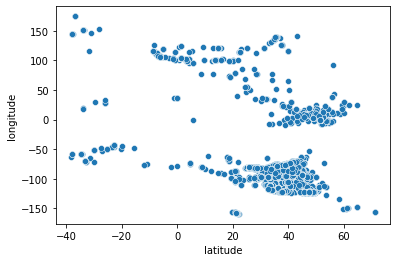

In [9]:
sns.scatterplot(
    x='latitude',
    y='longitude',
    data=stripped_df
)
plt.show()

#### !ВАЖНО
Нужно нормализовать

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
coords = stripped_df[['latitude', 'longitude']]

In [30]:
scaler = StandardScaler()
scaled_coords = scaler.fit_transform(coords)

Вот началась кластеризация

In [31]:
from sklearn.cluster import DBSCAN

In [54]:
dbscan = DBSCAN(eps=0.2, min_samples=10)

In [55]:
dbscan.fit(scaled_coords)

DBSCAN(eps=0.2, min_samples=10)

Метки можно достать здесь: `dbscan.labels_`

In [59]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 2])

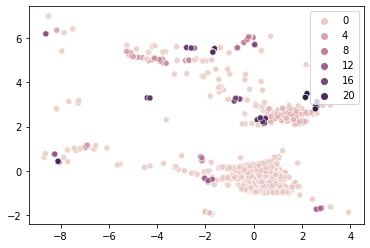

In [60]:
sns.scatterplot(
    x=scaled_coords[:, 0],
    y=scaled_coords[:, 1],
    hue=dbscan.labels_,
)
plt.show()

In [61]:
stripped_df['district'] = dbscan.labels_

In [62]:
stripped_df

,id,user_id,venue_id,latitude,longitude,created_at,district
68641,1019811,1341873.0,5222.0,40.714353,-74.005973,2012-04-23 00:34:15,0
329107,286765,223777.0,7620.0,37.654656,-122.407750,2011-12-24 03:02:42,0
73604,146597,105115.0,9822.0,40.650000,-73.950000,2011-12-11 21:28:59,0
545141,704305,483816.0,28304.0,46.786672,-92.100485,2012-03-17 15:19:21,0
967886,625753,294473.0,72083.0,34.023434,-84.615490,2012-01-30 10:55:28,0
...,...,...,...,...,...,...,...
980571,98490,307789.0,539779.0,37.774929,-122.419415,2011-12-10 21:45:11,0
78593,202599,100479.0,63554.0,39.339838,-74.575156,2011-12-13 20:53:22,0
570605,559945,78095.0,49866.0,40.650000,-73.950000,2012-01-28 01:52:25,0
341884,948341,108196.0,3104.0,38.954780,-77.449651,2012-04-12 23:43:21,0
